In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
%matplotlib inline
from genderize import Genderize
from scipy import stats


In [2]:
df=pd.read_csv('salary_travel_all.csv',encoding = "ISO-8859-1")
n=df['NAME'].str.split(' ', 1, expand=True)
n1=n[0].str.split(',', 1, expand=True)
df['FIRST_NAME']=n1[1]

In [3]:
df

,NAME,TITLE,SALARY,TRAVEL,ORGANIZATION,FISCAL_YEAR,FIRST_NAME
0,"COVINGTON,TAMMY D",CORRECTIONS OFFICER(WL),30416.88,90.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,TAMMY
1,"COWAN,SELINA L",CORRECTIONS OFFICER(WL),4726.76,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,SELINA
2,"COWSER,LATOYA",CORRECTIONS OFFICER(WL),3582.38,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,LATOYA
3,"COX,JAMES K",PROBATION/PAROLEOFFICER(EL),31060.00,168.83,"JUVENILE JUSTICE, DEPARTMENT OF",2013,JAMES
4,"COX-DENNIS,EVA",CORRECTIONS OFFICER(WL),34063.43,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,EVA
5,"COYLE,BARBARA L",PROBATION/PAROLEOFFICER(WL),34449.44,2256.90,"JUVENILE JUSTICE, DEPARTMENT OF",2013,BARBARA
6,"CRAFT,FRANKLIN B",PROGRAMMER (AL),61312.56,1533.09,"JUVENILE JUSTICE, DEPARTMENT OF",2013,FRANKLIN
7,"CRAIG,ANDA ELISE",PROBATION/PAROLEOFFICER(WL),4570.12,93.24,"JUVENILE JUSTICE, DEPARTMENT OF",2013,ANDA
8,"CRAIG,NEIL V",LAW ENFORCEMENT WORKER,976.00,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,NEIL
9,"CRANE,VANESSA JAN",CLERK (WL),30241.20,61.97,"JUVENILE JUSTICE, DEPARTMENT OF",2013,VANESSA


In [4]:
freq=df['FIRST_NAME'].value_counts()

In [5]:
#gender=[]
#prob=[]
#count=[]
genderize = Genderize(
    user_agent='GenderizeDocs/0.0',
    api_key='eda87f61c52501a6d6f42379dfd4d79a',
    timeout=5.0)

for i in range(50473,len(freq)):
    r=(genderize.get([freq.index[i]]))
    if r[0]["gender"] is not None:
        gender.append(r[0]["gender"])
        prob.append(r[0]["probability"])
        count.append(r[0]["count"])
        
    else:
        gender.append('0.0')
        prob.append('0.0')
        count.append('0.0')
    #if(i%10==0):
    #    print(i)
    
    

In [9]:
df_fn=pd.DataFrame(data=freq.index)
df_fn['gender']=gender
df_fn['prob']=prob
df_fn['count']=count

df_fn.to_pickle("./df_fn_all.pkl")

In [10]:
df2=df.copy()
df2=df2.merge(df_fn,how='left', left_on='FIRST_NAME', right_on=0)


In [11]:
df2

,NAME,TITLE,SALARY,TRAVEL,ORGANIZATION,FISCAL_YEAR,FIRST_NAME,0,gender,prob,count
0,"COVINGTON,TAMMY D",CORRECTIONS OFFICER(WL),30416.88,90.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,TAMMY,TAMMY,female,1,1378
1,"COWAN,SELINA L",CORRECTIONS OFFICER(WL),4726.76,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,SELINA,SELINA,female,1,176
2,"COWSER,LATOYA",CORRECTIONS OFFICER(WL),3582.38,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,LATOYA,LATOYA,female,0.99,126
3,"COX,JAMES K",PROBATION/PAROLEOFFICER(EL),31060.00,168.83,"JUVENILE JUSTICE, DEPARTMENT OF",2013,JAMES,JAMES,male,0.99,6359
4,"COX-DENNIS,EVA",CORRECTIONS OFFICER(WL),34063.43,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,EVA,EVA,female,1,1715
5,"COYLE,BARBARA L",PROBATION/PAROLEOFFICER(WL),34449.44,2256.90,"JUVENILE JUSTICE, DEPARTMENT OF",2013,BARBARA,BARBARA,female,1,2837
6,"CRAFT,FRANKLIN B",PROGRAMMER (AL),61312.56,1533.09,"JUVENILE JUSTICE, DEPARTMENT OF",2013,FRANKLIN,FRANKLIN,male,0.99,250
7,"CRAIG,ANDA ELISE",PROBATION/PAROLEOFFICER(WL),4570.12,93.24,"JUVENILE JUSTICE, DEPARTMENT OF",2013,ANDA,ANDA,female,0.8,30
8,"CRAIG,NEIL V",LAW ENFORCEMENT WORKER,976.00,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,NEIL,NEIL,male,1,1036
9,"CRANE,VANESSA JAN",CLERK (WL),30241.20,61.97,"JUVENILE JUSTICE, DEPARTMENT OF",2013,VANESSA,VANESSA,female,1,2704


In [12]:
df2_f=df2[df2['gender']=='female']
df2_m=df2[df2['gender']=='male']

In [20]:
freq_f=df2_f['TITLE'].value_counts()
freq_m=df2_m['TITLE'].value_counts()
freq_m=pd.DataFrame(data=freq_m)
freq_m=freq_m.reset_index()
freq_m.columns=['TITLE','COUNTS']
freq_f=pd.DataFrame(data=freq_f)
freq_f=freq_f.reset_index()
freq_f.columns=['TITLE','COUNTS']


In [27]:
sal_f=df2_f.groupby('TITLE', as_index=False)['SALARY'].median()
sal_m=df2_m.groupby('TITLE', as_index=False)['SALARY'].median()
sal_m=sal_m.merge(freq_m,how='left', left_on='TITLE', right_on='TITLE')
sal_f=sal_f.merge(freq_f,how='left', left_on='TITLE', right_on='TITLE')
sal=sal_m.merge(sal_f,how='left', left_on='TITLE', right_on='TITLE')
sal.columns = ['TITLE','SALARY_M','COUNTS_M','SALARY_F','COUNTS_F']
sal=sal.dropna()

In [28]:
sal

,TITLE,SALARY_M,COUNTS_M,SALARY_F,COUNTS_F
1,A/C MECHANIC 2 (GWCC),32799.250,11,36562.110,2.0
4,ACAD PROFESSIONAL AC SENIOR,163851.110,1,129689.300,1.0
5,ACAD SRV PARAPRO/PROFESSIONAL,33866.250,191,34802.540,637.0
7,ACADEMIC ADVISOR,35724.490,35,38112.240,116.0
8,ACADEMIC AFFAIRS MANAGER,62435.000,1,61633.090,8.0
9,ACADEMIC PROFESSIONAL AC,61999.980,1267,57002.720,1126.0
10,ACADEMIC SERVICES PROFESSIONAL,16627.740,4221,27030.260,8479.0
11,ACCOUNT SPECIALIST (TCSG),22195.390,1,31936.195,54.0
12,ACCOUNTABILITY DATA ANALYST,70371.120,3,51969.930,2.0
13,ACCOUNTABILITY RESEARCHANALYST,67983.240,4,50291.640,4.0


In [34]:
sal_largeN=sal[sal['COUNTS_M']>10000]
sal_largeN['COUNTS'] = sal_largeN.apply(lambda _: 'large', axis=1)


/home/svivek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
df2_m_largeN=df2_m.merge(sal_largeN,how='left', left_on='TITLE', right_on='TITLE')
df2_f_largeN=df2_f.merge(sal_largeN,how='left', left_on='TITLE', right_on='TITLE')
df2_m_largeN=df2_m_largeN.dropna(subset=['COUNTS'])
df2_f_largeN=df2_f_largeN.dropna(subset=['COUNTS'])

In [36]:
df2_m_largeN

,NAME,TITLE,SALARY,TRAVEL,ORGANIZATION,FISCAL_YEAR,FIRST_NAME,0,gender,prob,count,SALARY_M,COUNTS_M,SALARY_F,COUNTS_F,COUNTS
4,"HART,PRESTON L",CORRECTIONS OFFICER(WL),6381.35,330.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,PRESTON,PRESTON,male,0.99,136,25738.160,31347.0,26814.960,22278.0,large
5,"HART,SAMUEL JERRY",CORRECTIONS OFFICER(WL),22295.24,465.39,"JUVENILE JUSTICE, DEPARTMENT OF",2013,SAMUEL,SAMUEL,male,1,1409,25738.160,31347.0,26814.960,22278.0,large
9,"HARVEY,ANTHONY",CORRECTIONS OFFICER(WL),23294.79,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,ANTHONY,ANTHONY,male,1,3029,25738.160,31347.0,26814.960,22278.0,large
10,"HARVEY,DWAYNE",CORRECTIONS OFFICER(WL),13595.42,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,DWAYNE,DWAYNE,male,0.99,186,25738.160,31347.0,26814.960,22278.0,large
12,"HARVEY,WARREN T",CORRECTIONS OFFICER(WL),29266.24,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,WARREN,WARREN,male,1,402,25738.160,31347.0,26814.960,22278.0,large
16,"HAWKINS,JOHN H",CORRECTIONS OFFICER(WL),28803.07,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,JOHN,JOHN,male,0.99,9931,25738.160,31347.0,26814.960,22278.0,large
18,"HAWKINS,ROY D",CORRECTIONS OFFICER(WL),10965.51,300.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,ROY,ROY,male,0.99,651,25738.160,31347.0,26814.960,22278.0,large
22,"HAYES,DERRICK TODD",CORRECTIONS OFFICER(WL),12950.74,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,DERRICK,DERRICK,male,1,360,25738.160,31347.0,26814.960,22278.0,large
23,"HAYES,MICHAEL D",CORRECTIONS OFFICER(WL),11718.44,0.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,MICHAEL,MICHAEL,male,1,11094,25738.160,31347.0,26814.960,22278.0,large
24,"HAYNES,JOHN W",CORRECTIONS OFFICER(WL),6894.58,30.00,"JUVENILE JUSTICE, DEPARTMENT OF",2013,JOHN,JOHN,male,0.99,9931,25738.160,31347.0,26814.960,22278.0,large


In [41]:
sal_largeN['SALARY']=(sal_largeN['SALARY_M']+sal_largeN['SALARY_F'])/2
sal_largeN=sal_largeN.sort(['SALARY'])
#sal_largeN.plot.bar(x='TITLE', y='COUNTS_M_FRAC')

/home/svivek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [46]:
sal_largeN_frac=np.zeros((len(sal_largeN),2))
sal_largeN['COUNTS_M_FRAC']=sal_largeN['COUNTS_M']/sal_largeN['COUNTS_M'].sum()
sal_largeN['COUNTS_F_FRAC']=sal_largeN['COUNTS_F']/sal_largeN['COUNTS_F'].sum()
sal_largeN_frac[:,0]=sal_largeN['COUNTS_M_FRAC'].as_matrix()
sal_largeN_frac[:,1]=sal_largeN['COUNTS_F_FRAC'].as_matrix()
labels=list(sal_largeN['TITLE'])

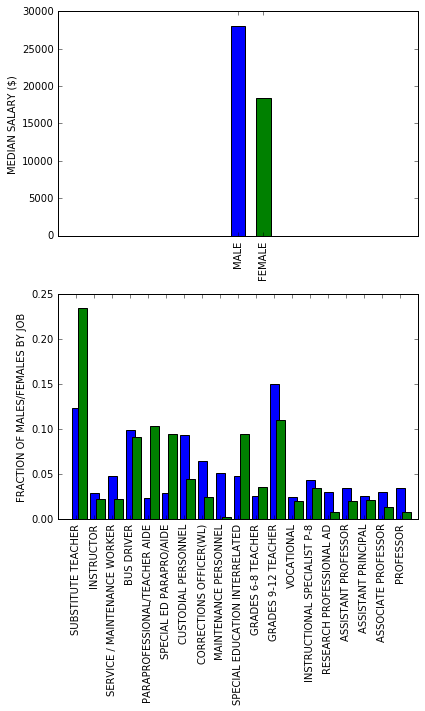

In [49]:
labels=list(sal_largeN['TITLE'])
fig=plt.figure()
plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.bar(np.zeros(1),df2_m_largeN['SALARY'].median(),align='center')
plt.bar(np.zeros(1)+1,df2_f_largeN['SALARY'].median(),color='g')
plt.xticks(np.array([0,1.4]), ['MALE','FEMALE'], rotation=90);
plt.ylabel('MEDIAN SALARY ($)')

#plt.ylim(0,40000)
plt.xlim(-10,10)
plt.subplot(2, 1, 2)
plt.bar(1.*np.arange(len(labels)), sal_largeN_frac[:,0],align='center',width=0.5)
plt.bar(1.*np.arange(len(labels))+.1, sal_largeN_frac[:,1],color='g',width=0.5)
#plt.bar(1.5*np.arange(len(labels))+.5, sal_largeN_frac[:,1],color='g',width=0.6)
plt.xlim(-1,19)
plt.xticks(1.0*np.arange(len(labels)), labels, rotation=90);
plt.ylabel('FRACTION OF MALES/FEMALES BY JOB')
plt.tight_layout()

plt.savefig('fig1.pdf')

In [ ]:
#FIGURE 2

In [77]:
x=sal_largeN['SALARY_F'].as_matrix()
y=(100*(sal_largeN['SALARY_M']-sal_largeN['SALARY_F'])/sal_largeN['SALARY_F']).as_matrix()
print(len(y[y>20]),len(y[y<20]))
x=x[y<20]
y=y[y<20]

3 16


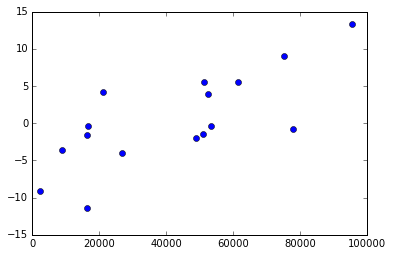

In [68]:
plt.plot(x,y,'o')


In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope,intercept,r_value**2)

0.000170825849977 -6.77960967691 0.551526278629


0.000170825849977 -6.77960967691 0.551526278629


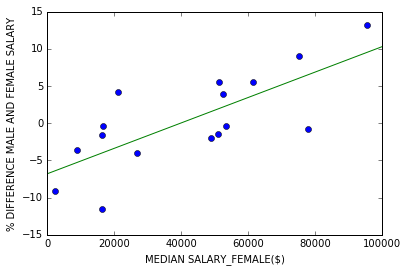

In [82]:
fig=plt.figure()
plt.plot(x,y,'o')
plt.plot(np.linspace(0,100000,100),slope*np.linspace(0,100000,100)+intercept)
plt.xlabel('MEDIAN SALARY_FEMALE($)')
plt.ylabel('% DIFFERENCE MALE AND FEMALE SALARY')
plt.savefig('fig2.pdf')